# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data loading and intial cleaning , Ensuring imputation

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_WR50.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(9270, 63) (9270,)


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis

In [4]:
intervention=df.iloc[:,-1]
data_min = X.min(axis=0)
data_max = X.max(axis=0)
data_norm = (X-data_min)/(data_max-data_min)

In [5]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

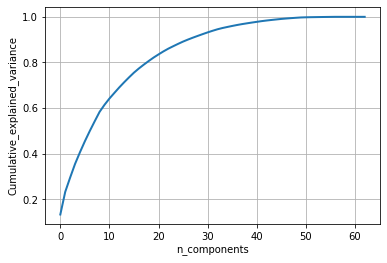

In [6]:
pca.n_components = 63
pca_data = pca.fit_transform(data_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis()
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [7]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

In [8]:
print(pca.components_)

[[ 2.20304516e-02 -8.64590193e-02  2.91658528e-01 ...  3.41871932e-02
  -3.52031841e-05  1.08935884e-02]
 [-1.67299915e-01  4.91102237e-01  4.46562557e-02 ... -1.56633684e-01
   1.23824312e-03 -1.14263496e-02]
 [-1.08970197e-01 -2.10635753e-02  1.82335365e-01 ...  2.37374495e-02
  -5.19931245e-05  2.57238832e-03]
 ...
 [-1.43255153e-02 -9.34599565e-02 -1.27045349e-01 ... -1.21769196e-01
   1.57471492e-02 -7.21501105e-02]
 [-9.75186028e-03  1.87326474e-02  2.55776586e-01 ... -1.64888247e-01
  -1.00077945e-02 -1.02866973e-01]
 [-2.74992127e-02 -8.91322873e-02 -3.56197713e-01 ...  1.27824174e-02
  -1.86434452e-02 -2.67488028e-02]]


[0.75111919 0.55629618 0.35003931 0.33455365 0.28603599 0.2693534
 0.25193255 0.23802917 0.2320265  0.1720668  0.15356582 0.1369343
 0.13543075 0.12669025 0.12097461 0.11563898 0.10197068 0.09368223
 0.08910783 0.08490602 0.07689095 0.07414632 0.06765851 0.05954477
 0.05828131 0.05530187 0.04959465 0.04647578 0.04405642 0.04314249]
[0.13414868 0.09935361 0.06251646 0.05975075 0.05108557 0.04810608
 0.04499475 0.04251163 0.04143956 0.03073085 0.02742661 0.02445625
 0.02418772 0.02262667 0.02160587 0.02065294 0.0182118  0.0167315
 0.01591452 0.01516408 0.0137326  0.01324241 0.0120837  0.0106346
 0.01040895 0.00987683 0.00885753 0.0083005  0.00786841 0.00770518]


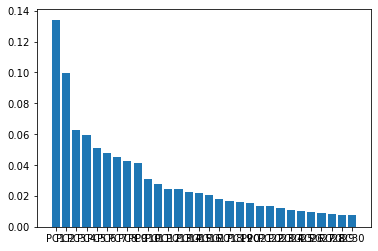

In [9]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.bar(x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","P20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"],height=pca.explained_variance_ratio_)
plt.show()

In [10]:
weights = pca.components_
weights = weights.transpose()
T = data_norm.dot(weights[:,:2])

In [11]:
print(T)

             0         1
0    -0.898615  1.206554
1     0.660803  1.290022
2     0.563507  1.289897
3    -0.846714 -1.104168
4     1.029812 -0.732026
...        ...       ...
9265 -0.915712 -0.729198
9266  0.967582 -0.344412
9267  0.722901 -0.430665
9268  0.616430 -0.381795
9269  1.061217 -0.373638

[9270 rows x 2 columns]


In [12]:
print(pca.explained_variance_)

[0.75111919 0.55629618 0.35003931 0.33455365 0.28603599 0.2693534
 0.25193255 0.23802917 0.2320265  0.1720668  0.15356582 0.1369343
 0.13543075 0.12669025 0.12097461 0.11563898 0.10197068 0.09368223
 0.08910783 0.08490602 0.07689095 0.07414632 0.06765851 0.05954477
 0.05828131 0.05530187 0.04959465 0.04647578 0.04405642 0.04314249]


In [13]:
print(pca.explained_variance_ratio_)

[0.13414868 0.09935361 0.06251646 0.05975075 0.05108557 0.04810608
 0.04499475 0.04251163 0.04143956 0.03073085 0.02742661 0.02445625
 0.02418772 0.02262667 0.02160587 0.02065294 0.0182118  0.0167315
 0.01591452 0.01516408 0.0137326  0.01324241 0.0120837  0.0106346
 0.01040895 0.00987683 0.00885753 0.0083005  0.00786841 0.00770518]


In [14]:
X=pca.transform(data_norm)

# Splitting The data

In [15]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (7416, 30) (7416,)
Test set:  (1854, 30) (1854,)


# Importing All model Building Library

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)



BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x217D392EB40)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x217D392EB40)

In [20]:
sv.fit(X_train, y_train)

SVC(C=15.0)

In [21]:
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x217D392EB40),
                  n_estimators=100, random_state=7)

In [24]:
EC.fit(X_train, y_train)

ExtraTreesClassifier(max_features=3)

In [25]:
ADC.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [26]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [27]:
LR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [28]:
BCR.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x217D392EB40),
                  n_estimators=100, random_state=7)

In [29]:
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#sv.fit(X_train, y_train)
#gnb.fit(X_train, y_train)
#KNN.fit(X_train, y_train)
#BC.fit(X_train, y_train)
#EC.fit(X_train, y_train)
#ADC.fit(X_train, y_train)
#GBC.fit(X_train, y_train)
#LR.fit(X_train, y_train)
#BCR.fit(X_train, y_train)
#mnb.fit(X_train, y_train)

# Predicting the Value

In [30]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)


# Getting Accuracy and AUC

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)


In [32]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)


In [33]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)

print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)


Decision tree acc: 0.694175
Random forest acc: 0.733549
SVM acc: 0.748652
Nabive Baise acc: 0.699029
KNN: 0.692017
BAGGING: 0.711435
Extra tree: 0.729773
ADC Boosting: 0.703344
GDC Boosting: 0.722222
Logistic: 0.706580
BAGGING Random Forest: 0.726537

Decision tree AUC: 0.596240
Random forest AUC: 0.651575
SVM AUC: 0.699043
gnb AUC: 0.623302
KNN AUC: 0.627926
Bagging AUC: 0.597221
Extra tree AUC: 0.649163
ADC Boosting: 0.623239
GDC Boosting: 0.618852
Logistic: 0.610447
BAGGING Random Forest: 0.631533


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


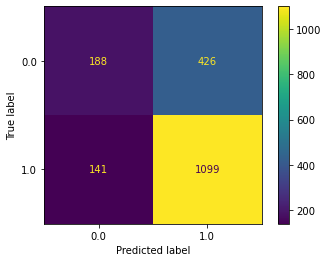

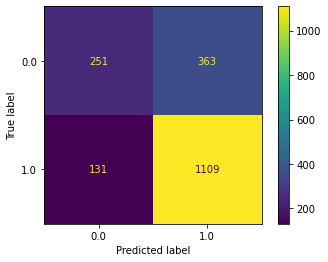

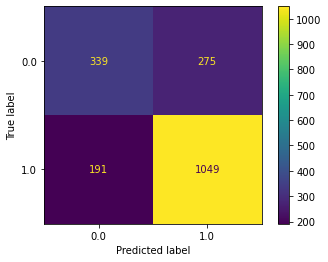

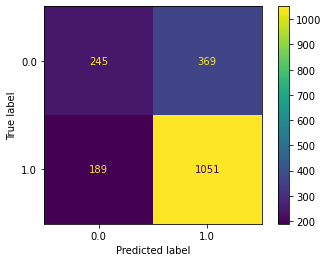

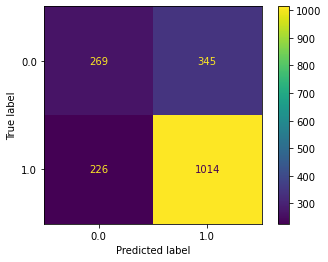

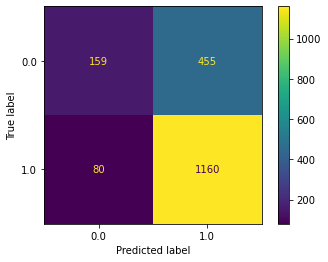

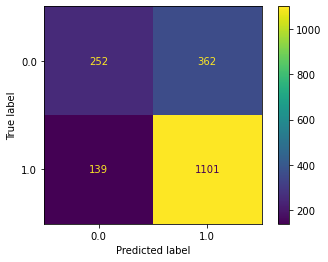

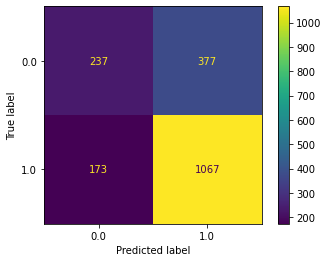

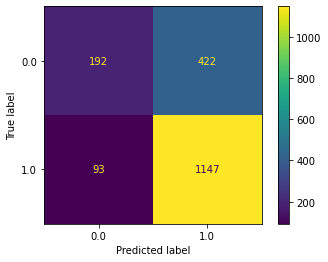

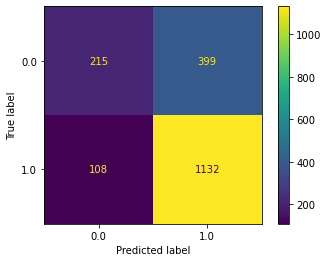

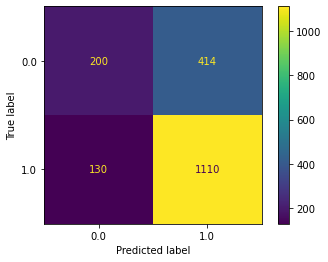

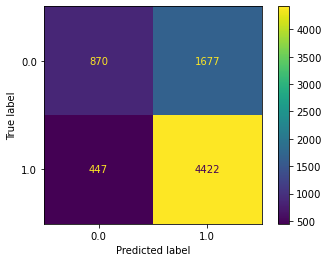

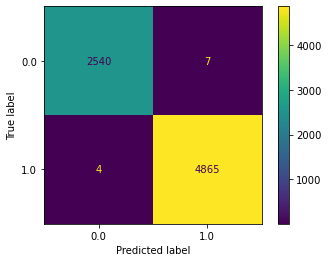

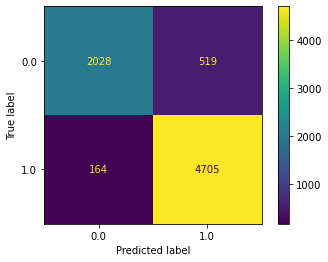

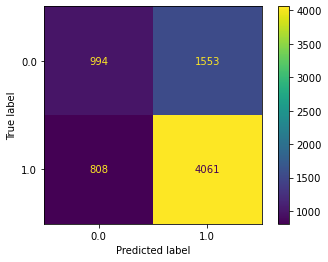

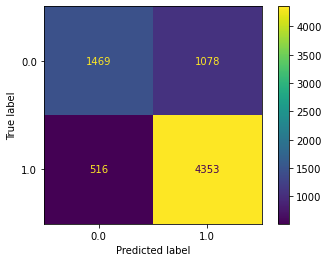

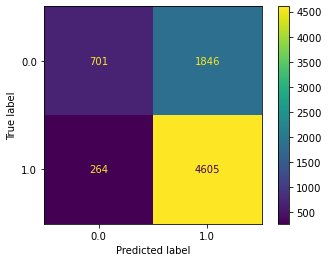

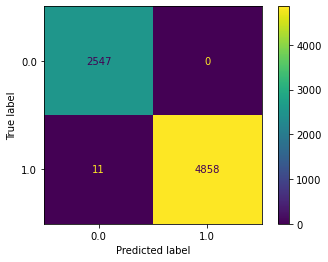

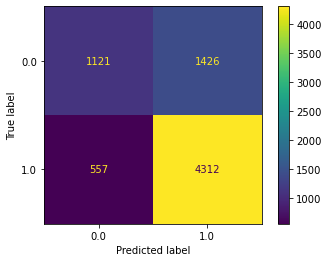

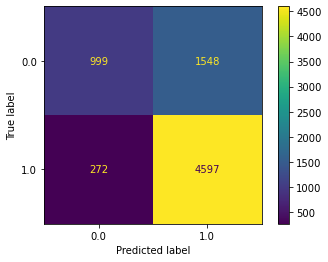

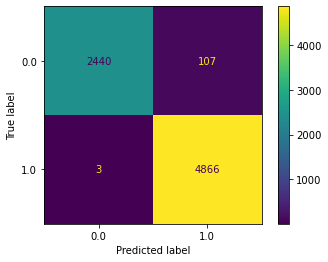

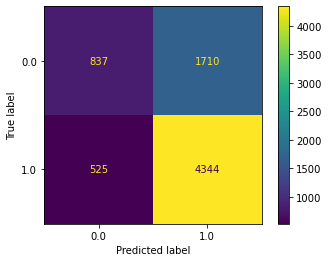

In [34]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)


p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)


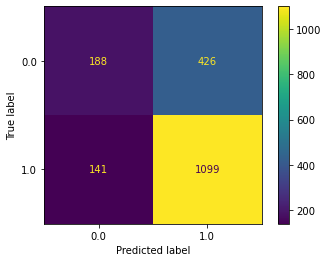

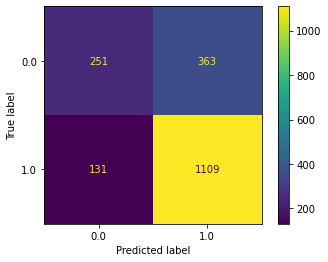

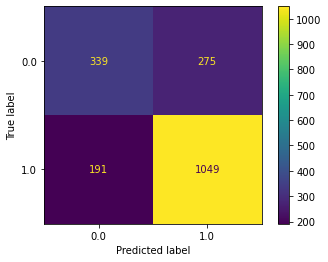

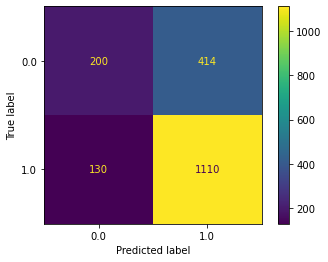

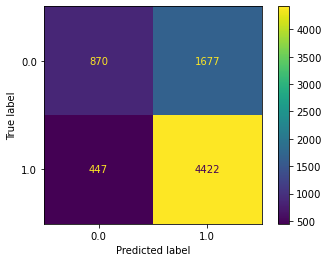

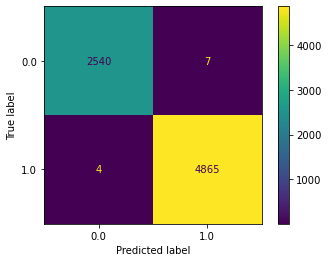

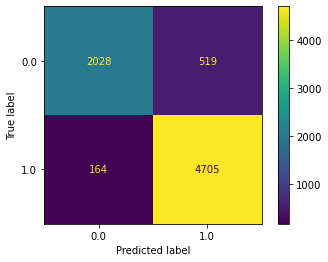

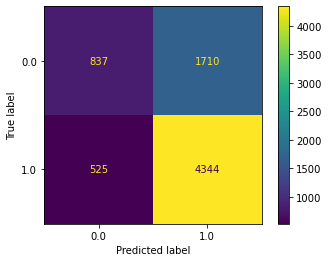

In [35]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

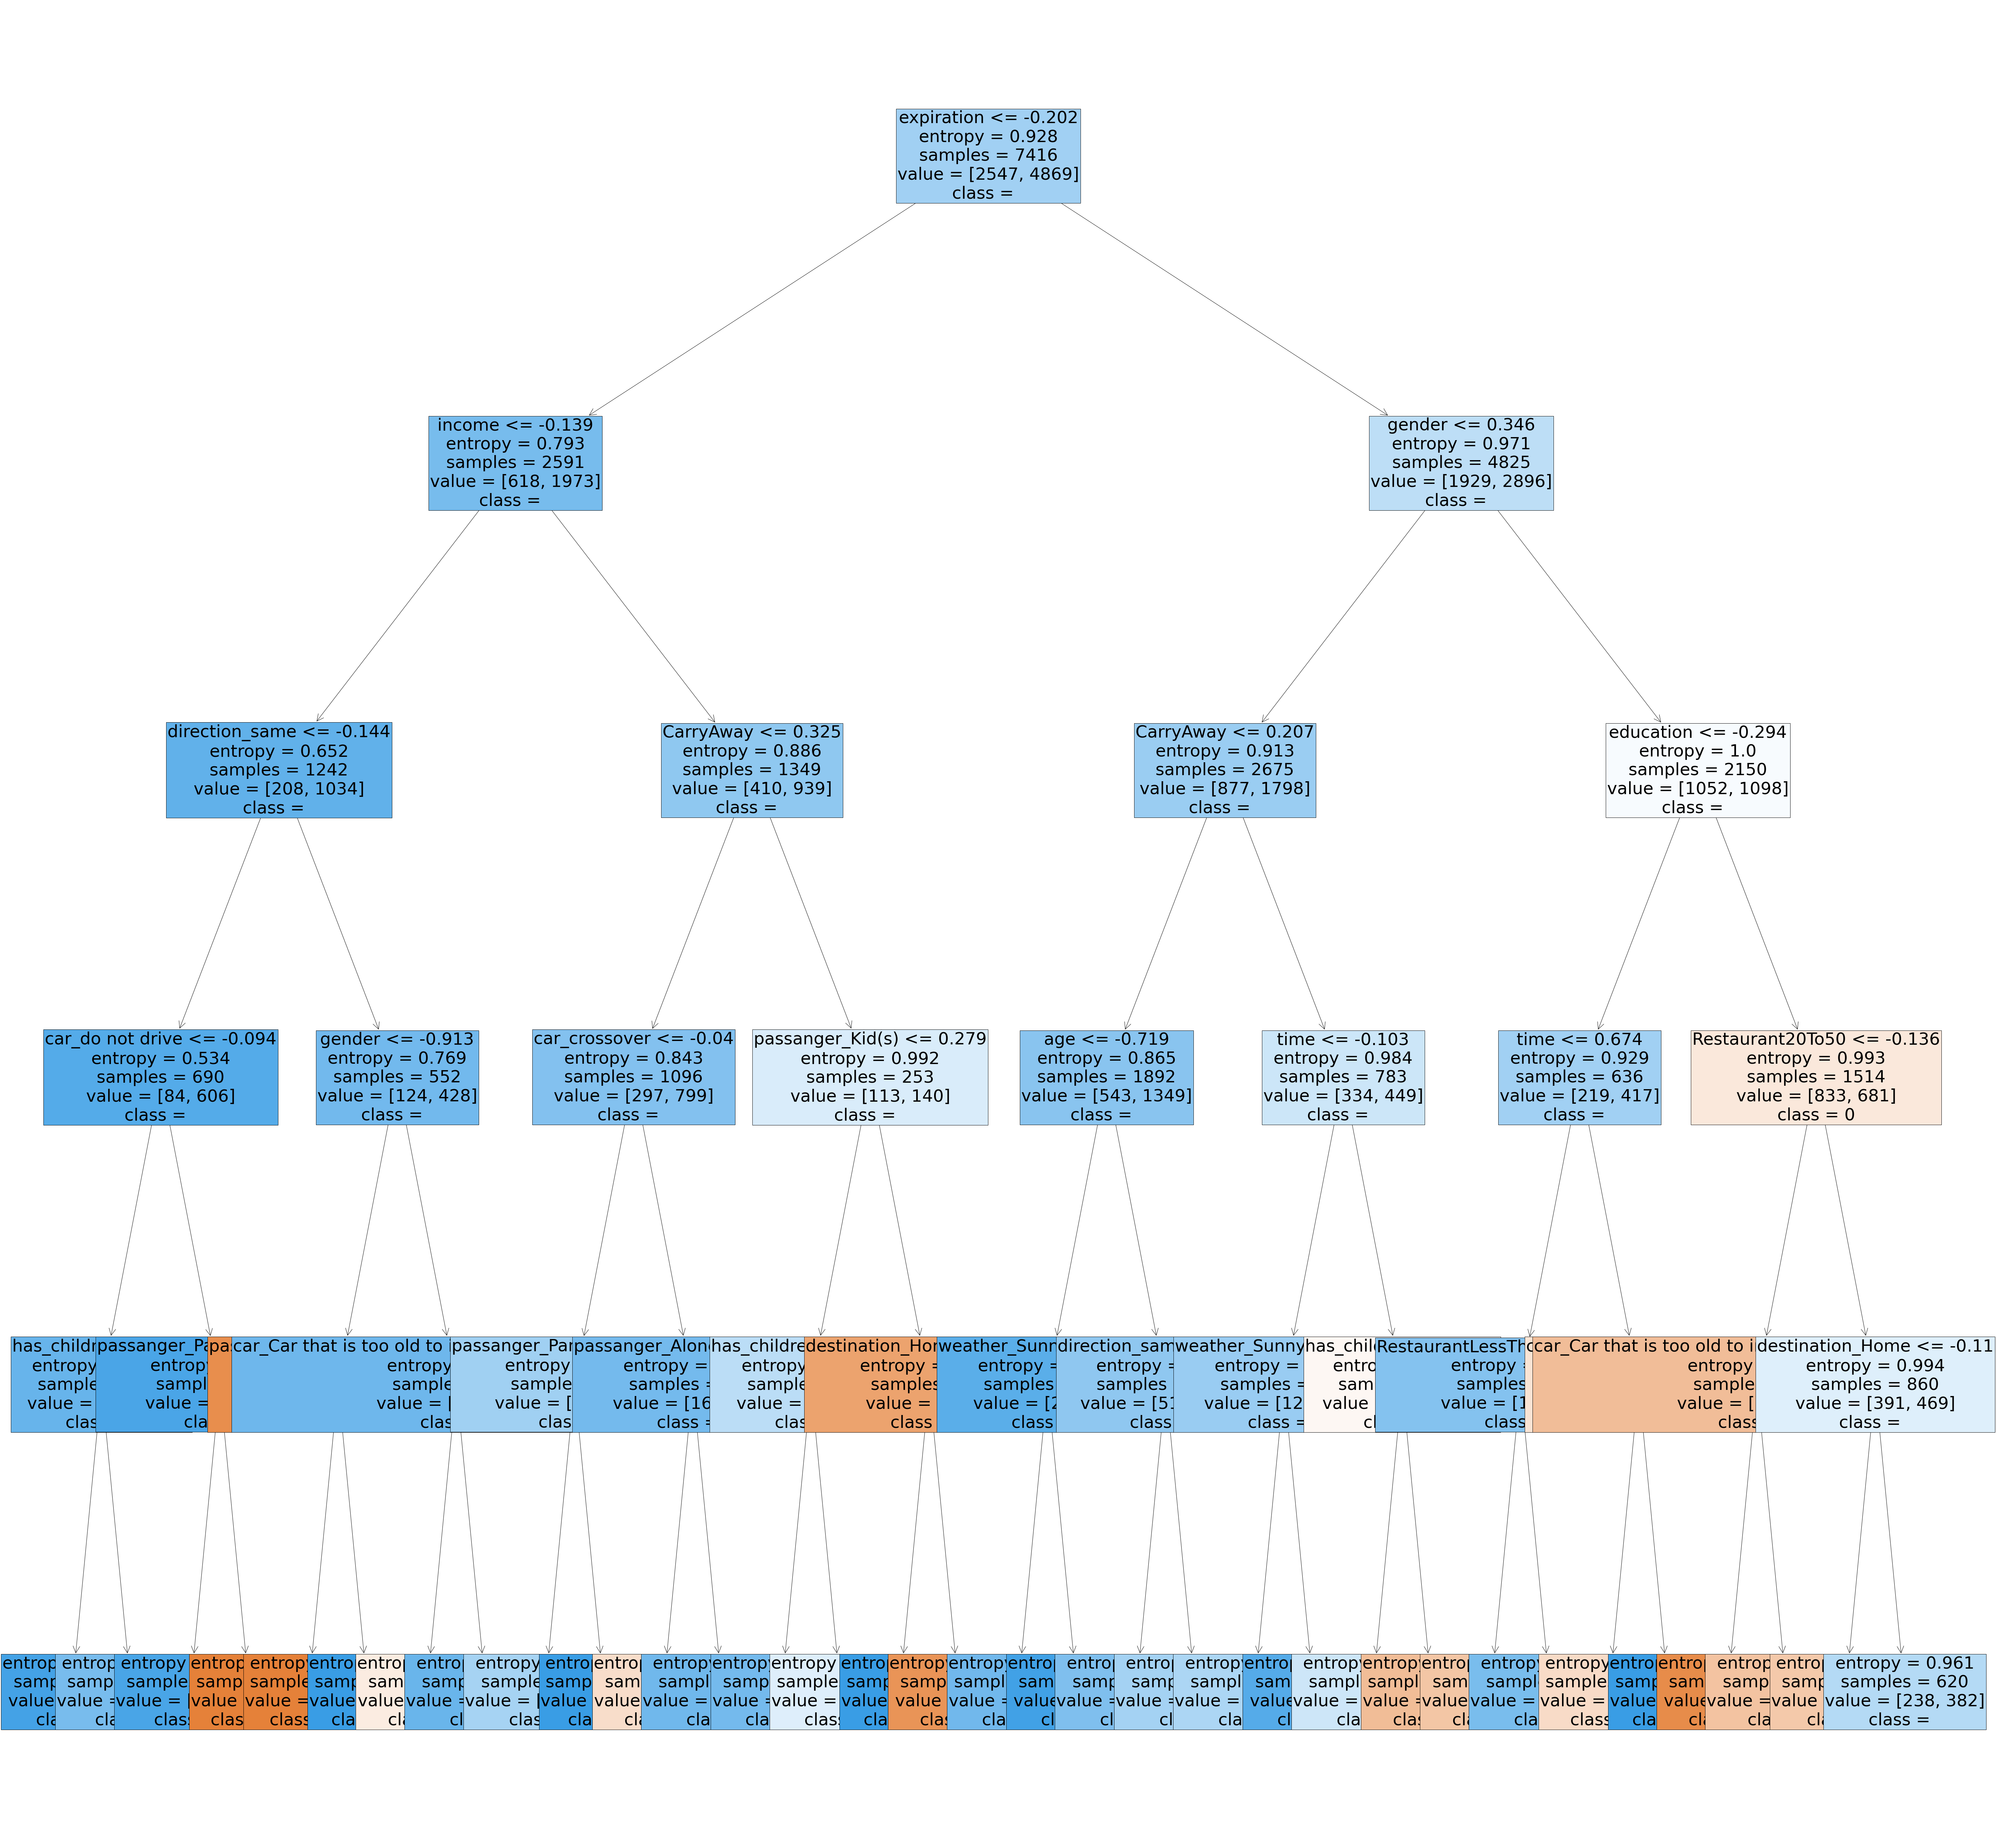

In [36]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_PCA_WN_WR50.png')

# Validating the Training set Accuracy


In [37]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)


dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)


dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)


print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)

print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)


Decision tree acc: 0.713592
Random forest acc: 0.998517
SVM acc: 0.907902
Nabive Baise acc: 0.681634
KNN: 0.785059
BAGGING: 0.715480
Extra tree: 0.998517
ADC Boosting: 0.732605
GDC Boosting: 0.754585
Logistic: 0.698625
BAGGING Random Forest: 0.985167

Decision tree AUC: 0.624887
Random forest AUC: 0.998215
SVM AUC: 0.881274
gnb AUC: 0.612158
KNN AUC: 0.735390
Bagging AUC: 0.610503
Extra tree AUC: 0.998870
ADC Boosting: 0.662864
GDC Boosting: 0.668181
Logistic: 0.610398
BAGGING Random Forest: 0.978687


In [38]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)


DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x217D392EB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x217D392EB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x217D392EB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x217D392EB40),
         

# Voting

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))


LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))




In [41]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6984897518878103


# Explorative data analysis


In [4]:
from matplotlib import pyplot

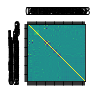

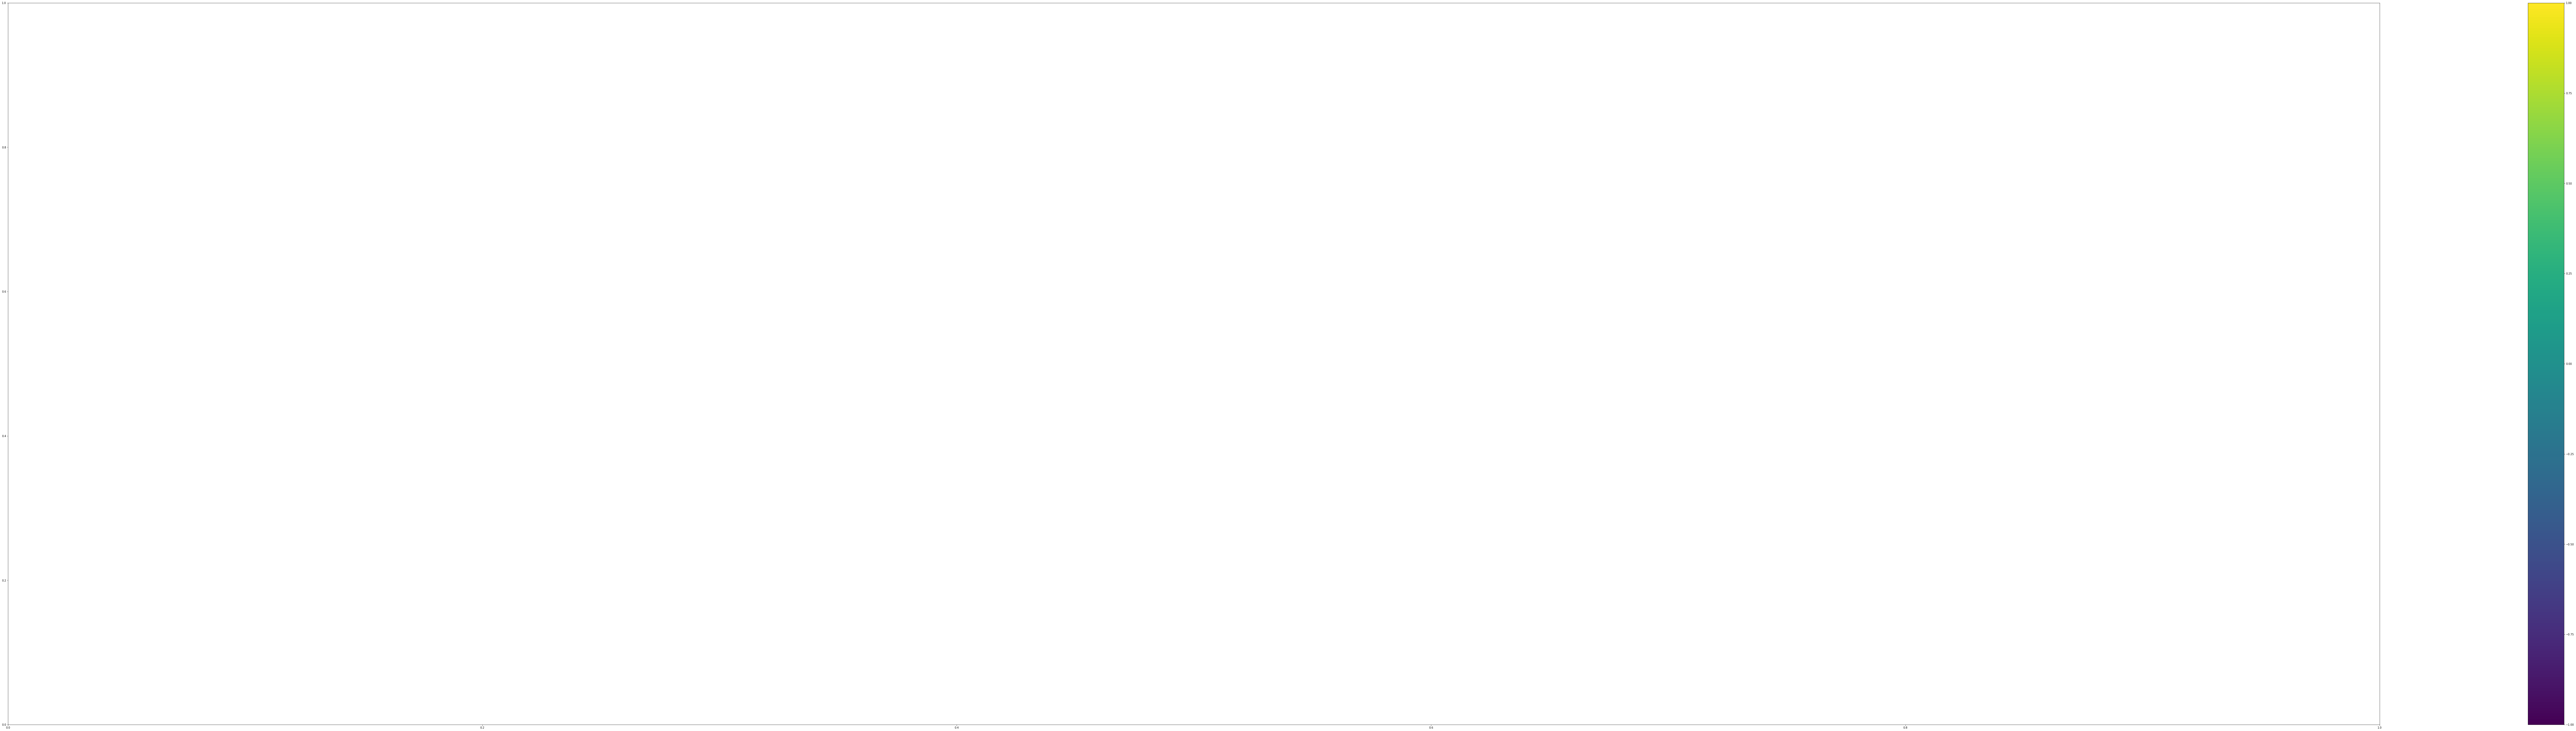

In [5]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(353)
fig = pyplot.figure(figsize =(200,50))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df.head()
ticks = np.arange(0,64,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [6]:
from pandas.plotting import scatter_matrix

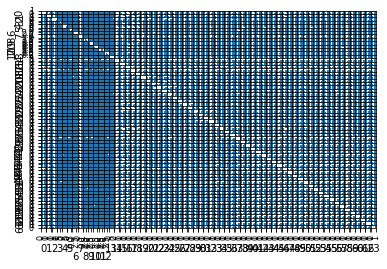

In [7]:
scatter_matrix(df)

pyplot.show()

In [8]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   54   55   56   57  \
0   1.0  1.0  0.0  6.0  4.0  6.0  1.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  1.0  1.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  1.0  3.0  1.0  1.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  4.0  4.0  2.0  1.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  3.0  2.0  2.0  1.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  1.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [9]:
shape = df.shape
print(shape)

(9270, 64)


In [10]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object


In [11]:
from pandas import set_option

In [12]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

         gender  has_children  direction_same    income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed         Y
count  9270.000      9270.000        9270.000  9270.000   9270.000  ...                    9270.000            9270.000                                     9270.000               9270.000  9270.000
mean      0.485         0.404           0.223     3.765      3.160  ...                       0.082               0.127                                        0.019                  0.142     0.659
std       0.500         0.491           0.416     2.569      1.268  ...                       0.275               0.333                                        0.138                  0.349     0.474
min       0.000         0.000           0.000     0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000     0.000
25%       

In [13]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    3161
1    6109
dtype: int64


In [14]:
correlations = df.corr(method='pearson')
print(correlations)

           0      1          2      3          4   ...     59     60     61     62     63
0   1.000e+00 -0.153 -4.181e-04  0.092 -1.954e-02  ...  0.026  0.107  0.068 -0.109  0.052
1  -1.532e-01  1.000 -4.487e-02  0.094  7.903e-02  ... -0.036 -0.223  0.050 -0.024 -0.020
2  -4.181e-04 -0.045  1.000e+00 -0.029  1.141e-04  ...  0.006  0.025 -0.002  0.014  0.005
3   9.189e-02  0.094 -2.857e-02  1.000  2.914e-01  ... -0.072 -0.132 -0.009 -0.074 -0.045
4  -1.954e-02  0.079  1.141e-04  0.291  1.000e+00  ... -0.021 -0.147 -0.066 -0.105 -0.070
..        ...    ...        ...    ...        ...  ...    ...    ...    ...    ...    ...
59  2.646e-02 -0.036  5.590e-03 -0.072 -2.077e-02  ...  1.000 -0.114 -0.042 -0.122  0.007
60  1.067e-01 -0.223  2.514e-02 -0.132 -1.468e-01  ... -0.114  1.000 -0.054 -0.155  0.019
61  6.845e-02  0.050 -2.206e-03 -0.009 -6.649e-02  ... -0.042 -0.054  1.000 -0.057  0.002
62 -1.095e-01 -0.024  1.391e-02 -0.074 -1.048e-01  ... -0.122 -0.155 -0.057  1.000  0.017
63  5.240e

In [15]:
skew = df.skew()
print(skew)

0     0.061
1     0.393
2     1.330
3     0.342
4    -0.118
      ...  
59    3.043
60    2.241
61    6.967
62    2.055
63   -0.671
Length: 64, dtype: float64


In [16]:
skew.to_csv('Skew2_PCA_WN_WR50.csv', index=False)

In [17]:
correlations.to_csv('correlations_PCAWN_WR50.csv', index=False)

In [18]:
description.to_csv('description_PCA_WN_WR50.csv', index=False)

# Random Forest Tree

In [57]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

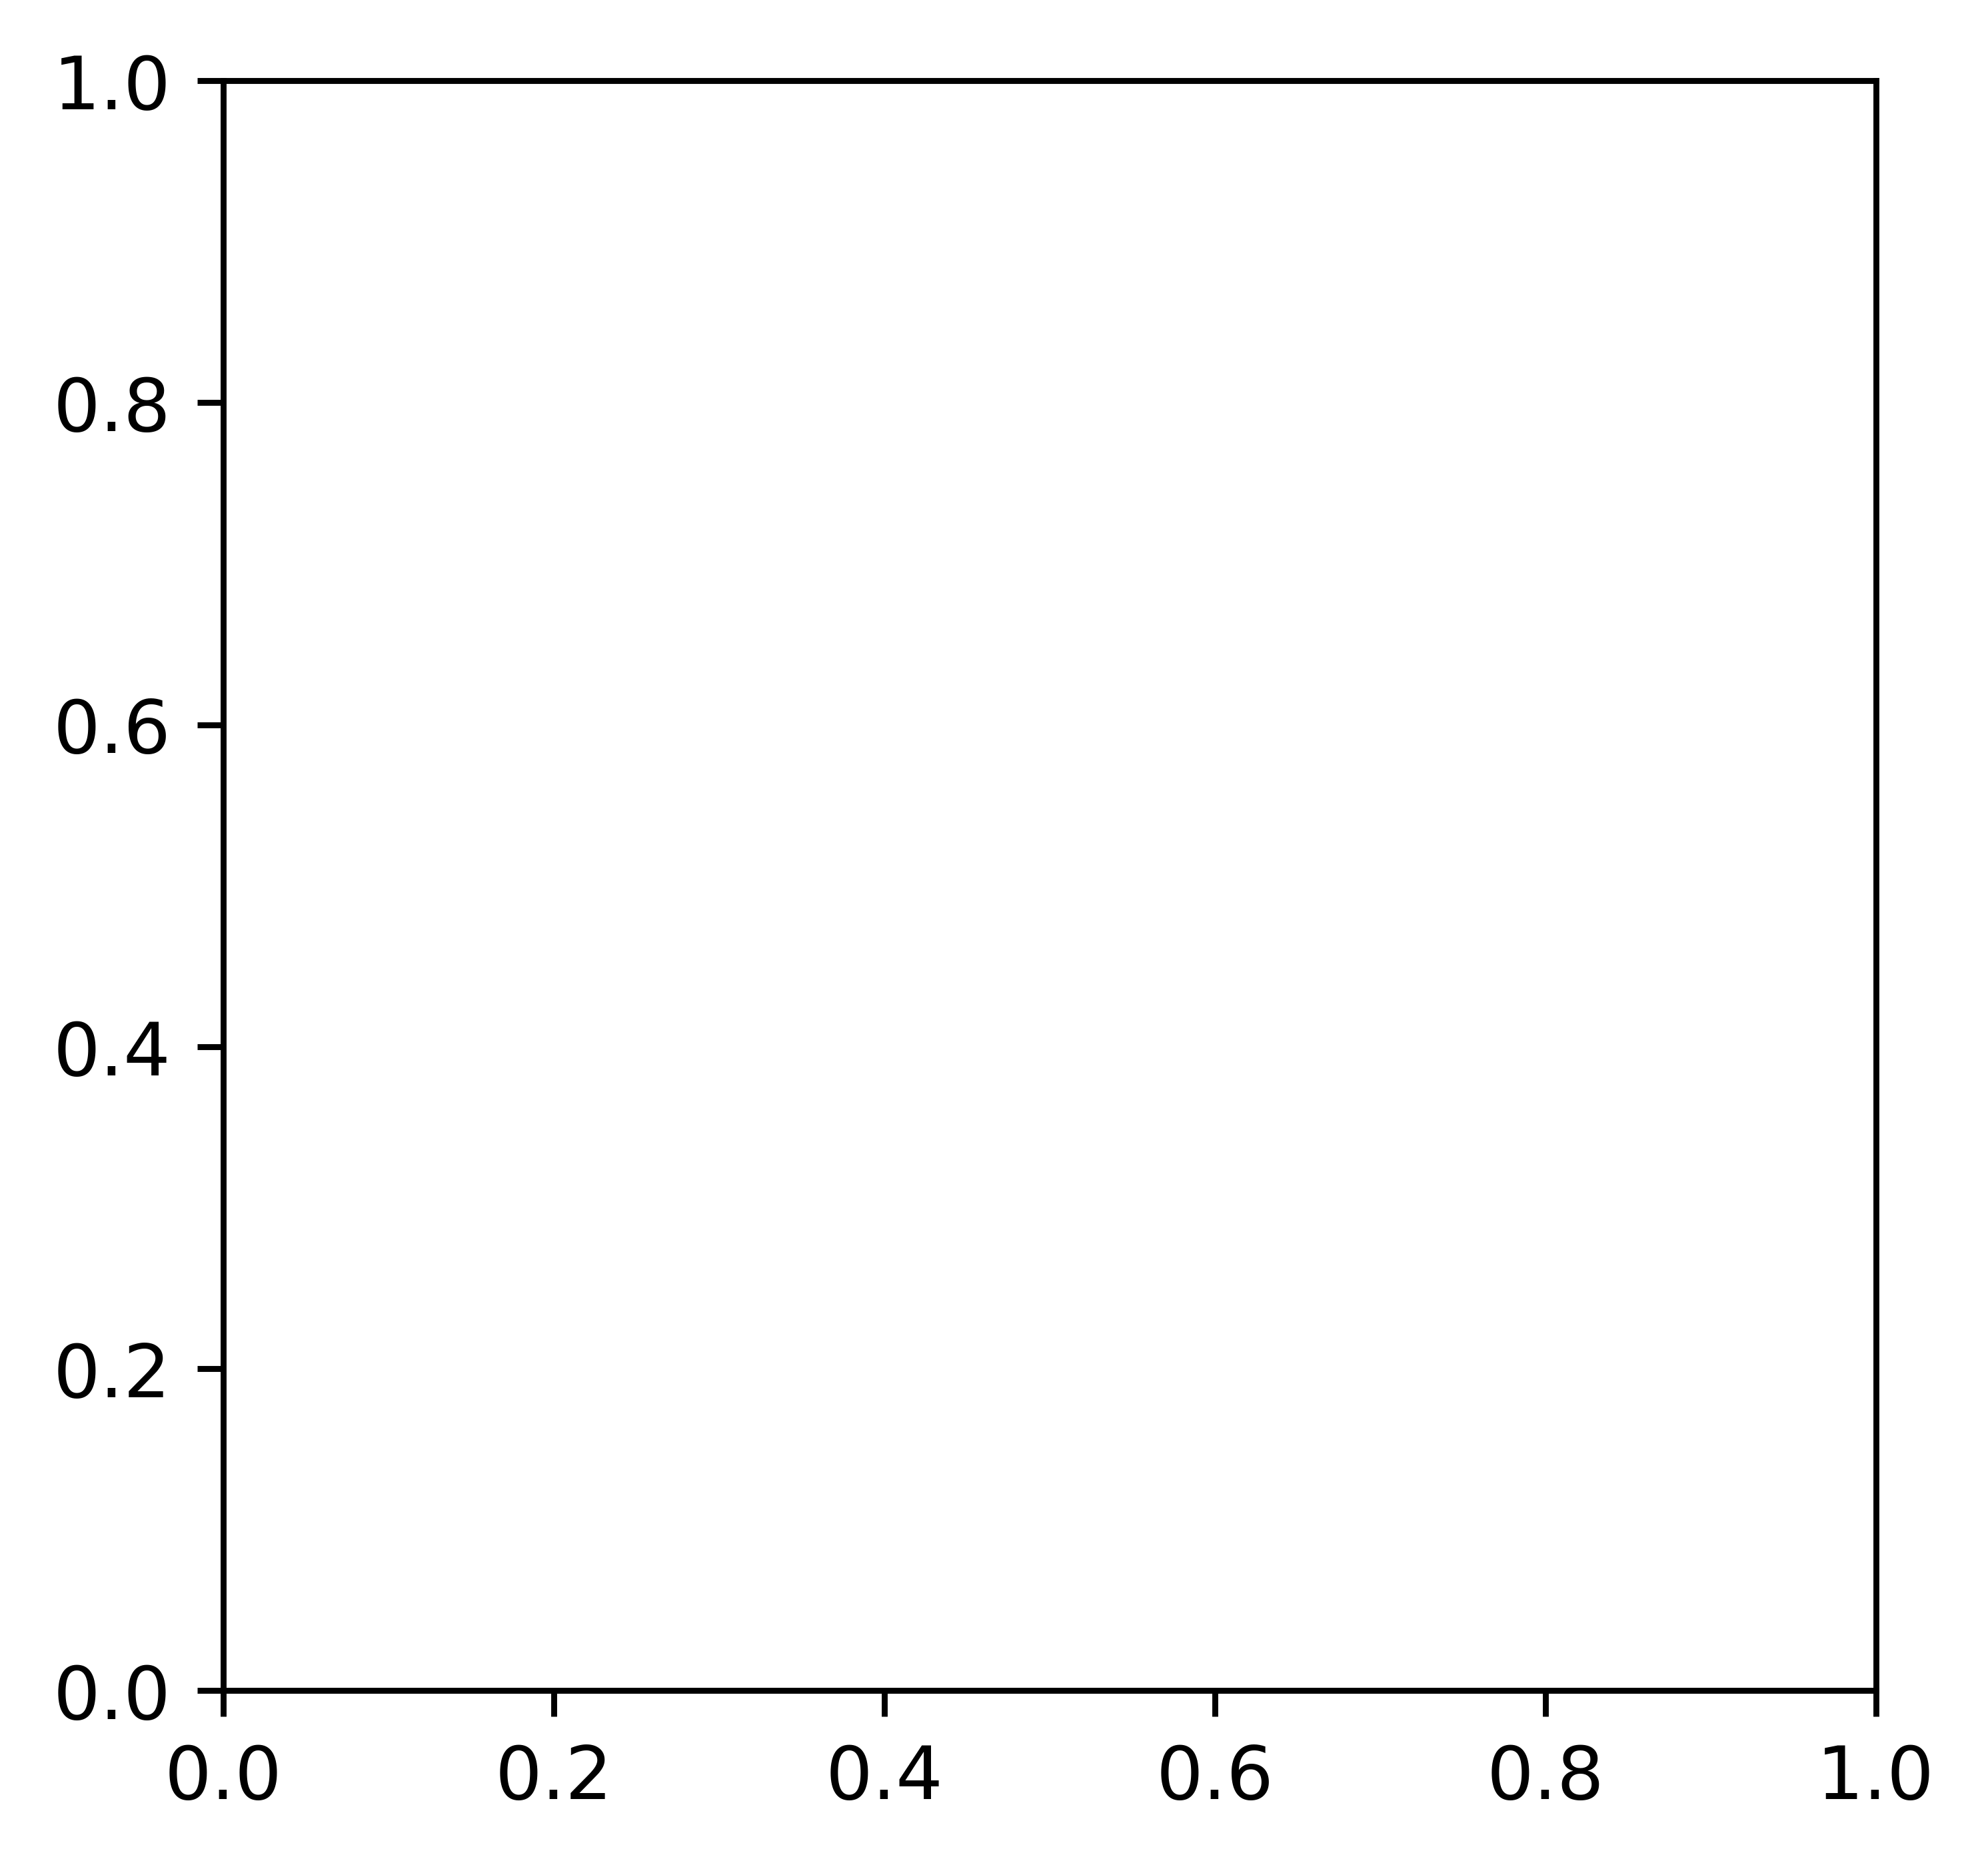

In [58]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_PCA_WN_WR50.png')